# terrabyte STAC API - Discovery and Access of data using the **S**patio**T**emporal **A**sset **C**atalogue


## Table of Content

* [1. Introduction](#intro)
* [2. What is STAC?](#stac)
* [3. How to use the catalogue](#catalogue)
    * [3.1 General Settings](#settings)
    * [3.2 Get general information about the Catalog](#information)
    * [3.3 Discover Collections](#collections)
    * [3.4 Discover Items](#items)
* [4. Loading a data cube](#loading)
* [5. More tutorials](#tutorials)




## <a id ='intro'></a> 1. Introduction

### Why STAC?
![stac_story](stac_onboarding.png)

*Image based on Zellner et al. (2024). Cubes & Clouds - Cloud Native Open Data Sciences for Earth Observation (v1.0.0). Zenodo. https://doi.org/10.5281/zenodo.10869466*

Satellites are scanning our planet. Their number is steadily increasing, so is the data volume they produce. These volumes of data can not be stored on personal computers anymore. The images are stored on clouds or cloud platforms. **STAC is a format to describe spatio temporal metadata. It makes the images discoverable and accessible for users.**

### STAC on terrabyte
The terrabyte STAC catalog provides interoperable access to metadata from EO collections and geospatial products. The majority of data is available via the terrabyte STAC catalog or can be accessed on the terrabyte Data Science Storage (DSS) geodata file system. STAC provides the user a more efficient way of data discovery for further processing.

The easiest way to interact with the terrabyte STAC Catalogue is via the **terrabyte STAC browser**: https://stac.terrabyte.lrz.de/browser/


## <a id ='stac'></a> 2. What is STAC?

STAC (Spatio Temporal Asset Catalog) is a standardized data model for cataloging and exchanging geospatial and temporal data, particularly focused on satellite-based Earth Observation (EO) data.
At its core, the SpatioTemporal Asset Catalog (STAC) specification provides a common structure for describing and cataloging spatiotemporal assets.
A spatiotemporal asset is any file that represents information about the earth captured in a certain space and time.


The STAC Specification consists of 4 semi-independent specifications. Each can be used alone, but they work best in concert with one another.

[**STAC Item**](https://github.com/radiantearth/stac-spec/blob/master/item-spec/item-spec.md) is the core atomic unit, representing a single spatiotemporal asset as a GeoJSON feature plus datetime and links.

[**STAC Catalog**](https://github.com/radiantearth/stac-spec/blob/master/catalog-spec/catalog-spec.md) is a simple, flexible JSON file of links that provides a structure to organize and browse STAC Items. A series of best practices helps make recommendations for creating real world STAC Catalogs.

[**STAC Collection**](https://github.com/radiantearth/stac-spec/blob/master/collection-spec/collection-spec.md) is an extension of the STAC Catalog with additional information such as the extents, license, keywords, providers, etc that describe STAC Items that fall within the Collection.

[**STAC API**](https://github.com/radiantearth/stac-api-spec) provides a RESTful endpoint that enables search of STAC Items, specified in OpenAPI, following OGC's WFS 3.

![stac_hierarchy](https://github.com/EO-College/cubes-and-clouds/blob/main/lectures/2.1_data_discovery/assets/stac_hierarchy.png?raw=true)

*Image by Matthias Mohr from https://mohr.ws/foss4g/*

## <a id ='catalogue'></a> 3. How to use the catalogue
This chapter provides general information on how the user can operate the catalogue.
In addition to the installation of the Python modules required for STAC, access to the collections and items is shown here.

### <a id ='settings'></a> 3.1 General Settings

In [1]:
# import STAC libraries
from pystac_client import Client
from pystac import Collection
from pystac.extensions.raster import RasterExtension

import xarray
import rioxarray
import pandas as pd
from shapely.geometry import box, shape
from odc import stac as odc_stac
from odc.stac import load
import dask

### <a id ='information'></a> 3.2 Get general information about the Catalog

Define Catalogue Connection

In [2]:
catalog_url = "https://stac.terrabyte.lrz.de/public/api"
catalog = Client.open(catalog_url)

In [3]:
print(f"ID: {catalog.id}")
print(f"Title: {catalog.title}")
print(f"Description: {catalog.description}")

ID: terrabyte-public-stac-api
Title: terrabyte STAC API
Description: Curated data catalog of the terrabyte platform available at https://stac.terrabyte.lrz.de/public/api


### <a id ='collections'></a> 3.3 Discover Collections

##### "A STAC Collection provides additional information about a spatio-temporal collection of data. It extends Catalog directly, layering on additional fields to enable description of things like the spatial and temporal extent of the data, the license, keywords, providers, etc. It in turn can easily be extended for additional collection level metadata. It is used standalone by parts of the STAC community, as a lightweight way to describe data holdings." [(STAC Spec)](https://stacspec.org/en/about/stac-spec/)

Here we receive a tabular overview of all collections available in the catalog.
The IDs and the corresponding title are listed. 
The ID of the respective collection is used to obtain further information on the collection.
Furthermore in the future we will provide an overview of the availability of all datasets https://docs.terrabyte.lrz.de/datasets/terrabyte-datasets/inventory/

In [4]:
collections = catalog.get_all_collections()
for i, collection in enumerate(collections, start=1):
    print(
        f"{i} | {collection.id} | {collection.title} | "
        f"{collection.extent.temporal.intervals[0][0].year} - "
        f"{collection.extent.temporal.intervals[0][1].year}"
    )

1 | modis-09gq-061 | MOD09GQ.061 & MYD09GQ.061: MODIS Surface Reflectance Daily (250m) | 2000 - 2024
2 | viirs-13a1-002 | VNP13A1.002: VIIRS Vegetation Indices 16-Day (500m) | 2025 - 2025
3 | sentinel-1-nrb | Sentinel-1 Normalized Radar Backscatter (NRB) | 2015 - 2024
4 | modis-13a2-061 | MOD13A2.061 & MYD13A2.061: MODIS Vegetation Indices 16-Day (1km) | 2000 - 2024
5 | viirs-09ga-002 | VNP09GA.002: VIIRS/NPP Surface Reflectance Daily L2GD 500m and 1km | 2025 - 2025
6 | viirs-15a2h-002 | VNP15A2H.002: VIIRS Leaf Area Index/FPAR 8-Day | 2025 - 2025
7 | modis-13q1-061 | MOD13Q1.061 & MYD13Q1.061: MODIS Vegetation Indices 16-Day (250m) | 2000 - 2024
8 | viirs-10a1-002 | VNP10A1.002: VIIRS/NPP Snow Cover Daily L3 (375m), Version 2 | 2025 - 2025
9 | sentinel-1-slc | Sentinel-1 SLC Level-1 | 2016 - 2025
10 | sentinel-2-c1-l2a | Sentinel-2 Collection 1 Level-2A | 2015 - 2025
11 | viirs-13a1-001 | VNP13A1.001: VIIRS Vegetation Indices 16-Day (500m) | 2012 - 2024
12 | sentinel-2-l1c | Sentinel-

### <a id ='items'></a> 3.4 Discover Items 

##### "Fundamental to any STAC, a STAC Item represents an atomic collection of inseparable data and metadata. A STAC Item is a GeoJSON feature and can be easily read by any modern GIS or geospatial library. The STAC Item JSON specification includes additional fields for the time the asset represents, a thumbnail for quick browsing, asset links, links to the described data and relationship links, allowing users to traverse other related STAC Items." [(STAC Spec)](https://stacspec.org/en/about/stac-spec/)


#### Filter your query

To avoid long loading times, the results can be limited.
Especially if you are interested in data from a specific region, for a specific time or with specific attributes such as cloud cover etc.
The limit parameter defines the number of items to return per page of results and can affect the duration of your query.

Extensions can help to describe data completely. To know which extensions are available for your collection check the STAC browser or the print the item information (as done below).
In the following example, we are refining our search by filtering for cloud cover below 20%.

In [5]:
collection = ["sentinel-2-c1-l2a"]

query = {
    'eo:cloud_cover': {
        "gte": 0,
        "lte": 20
    }
}

bbox_germany=[5.98,47.30,15.01,54.98]

start = '2023-10-01T00:00:00Z'
end = '2024-01-31T23:59:59Z'

bands = ["red", "green", "blue"]

limit = 1000 # A recommendation to the service as to the number of items to return per page of results. Defaults to 100.

In [6]:
%%time
search_germany = catalog.search(collections=collection, 
                                datetime=[start, end], 
                                query=query,
                                limit=limit,
                                bbox=bbox_germany)
items_germany = search_germany.item_collection() 
print(f"Search returned {len(items_germany)} items. The limit variable was set to {limit}.")

Search returned 443 items. The limit variable was set to 1000.
CPU times: user 631 ms, sys: 23.4 ms, total: 655 ms
Wall time: 4.77 s


#### Get information about Items
Inspect one item

In [7]:
# one item
items_germany[0]

<Item id=S2A_MSIL2A_20240131T102251_N0510_R065_T33UVA_20240131T120750>

List all items

In [8]:
for item in items_germany:
    print(f"- {item.properties['platform']} - {item.properties['datetime']} - {item.properties['grid:code']} - {item.properties['eo:cloud_cover']}")

- sentinel-2a - 2024-01-31T10:22:51.024000Z - MGRS-33UVA - 14.849807
- sentinel-2a - 2024-01-31T10:22:51.024000Z - MGRS-33UUB - 20.52241
- sentinel-2a - 2024-01-31T10:22:51.024000Z - MGRS-33UUA - 16.107471
- sentinel-2a - 2024-01-31T10:22:51.024000Z - MGRS-32UPF - 12.082554
- sentinel-2b - 2024-01-30T10:01:49.024000Z - MGRS-33UWR - 15.669832
- sentinel-2b - 2024-01-30T10:01:49.024000Z - MGRS-33UUQ - 7.288156
- sentinel-2b - 2024-01-30T10:01:49.024000Z - MGRS-33UUP - 15.002677
- sentinel-2b - 2024-01-30T10:01:49.024000Z - MGRS-33TWN - 3.070894
- sentinel-2b - 2024-01-30T10:01:49.024000Z - MGRS-33TVN - 0.004854
- sentinel-2b - 2024-01-30T10:01:49.024000Z - MGRS-33TUN - 0.041154
- sentinel-2b - 2024-01-30T10:01:49.024000Z - MGRS-32TQT - 0.263332
- sentinel-2b - 2024-01-29T10:32:09.024000Z - MGRS-32UNU - 10.193405
- sentinel-2a - 2024-01-28T10:13:01.024000Z - MGRS-33UWS - 3.712707
- sentinel-2a - 2024-01-28T10:13:01.024000Z - MGRS-33UWR - 0.138388
- sentinel-2a - 2024-01-28T10:13:01.024000

## <a id ='loading'></a> 4. Loading a data cube

#### Lazily load the results using odc_stac, xarray and dask

The library `odc_stac` tells `xarray` how to interpret the STAC metadata to create a geo data cube. `dask` allows for lazy evaluation of the loading and processing.  

In [9]:
bbox_ammersee = {"bbox": [11.07, 47.95, 11.20, 48.08]}  # reducing a bit for speed

cube_s2 = odc_stac.load(
    items_germany,
    bbox=bbox_ammersee["bbox"],
    groupby="solar_day",
    chunks={"time": -1},  # keep time in one chunk.
    bands=bands,
    nodata=0,
)

We can evaluate the dimensions of our cube, it's size and how it is chunked.

In [10]:
cube_s2

<xarray.Dataset>
Dimensions:      (y: 1473, x: 1010, time: 60)
Coordinates:
  * y            (y) float64 5.328e+06 5.328e+06 ... 5.313e+06 5.313e+06
  * x            (x) float64 6.542e+05 6.542e+05 ... 6.643e+05 6.643e+05
    spatial_ref  int32 32632
  * time         (time) datetime64[ns] 2023-10-01T10:27:39.024000 ... 2024-01...
Data variables:
    red          (time, y, x) uint16 dask.array<chunksize=(1, 1473, 1010), meta=np.ndarray>
    green        (time, y, x) uint16 dask.array<chunksize=(1, 1473, 1010), meta=np.ndarray>
    blue         (time, y, x) uint16 dask.array<chunksize=(1, 1473, 1010), meta=np.ndarray>

This is a common processing step. Aggregating to monthly means. Still no data is loaded!

In [11]:
cube_s2 = cube_s2.resample(time="1ME").mean()

In [12]:
cube_s2

<xarray.Dataset>
Dimensions:      (y: 1473, x: 1010, time: 4)
Coordinates:
  * y            (y) float64 5.328e+06 5.328e+06 ... 5.313e+06 5.313e+06
  * x            (x) float64 6.542e+05 6.542e+05 ... 6.643e+05 6.643e+05
    spatial_ref  int32 32632
  * time         (time) datetime64[ns] 2023-10-31 2023-11-30 ... 2024-01-31
Data variables:
    red          (time, y, x) float64 dask.array<chunksize=(1, 1473, 1010), meta=np.ndarray>
    green        (time, y, x) float64 dask.array<chunksize=(1, 1473, 1010), meta=np.ndarray>
    blue         (time, y, x) float64 dask.array<chunksize=(1, 1473, 1010), meta=np.ndarray>

Let's plot the results. Now the data has to be loaded.

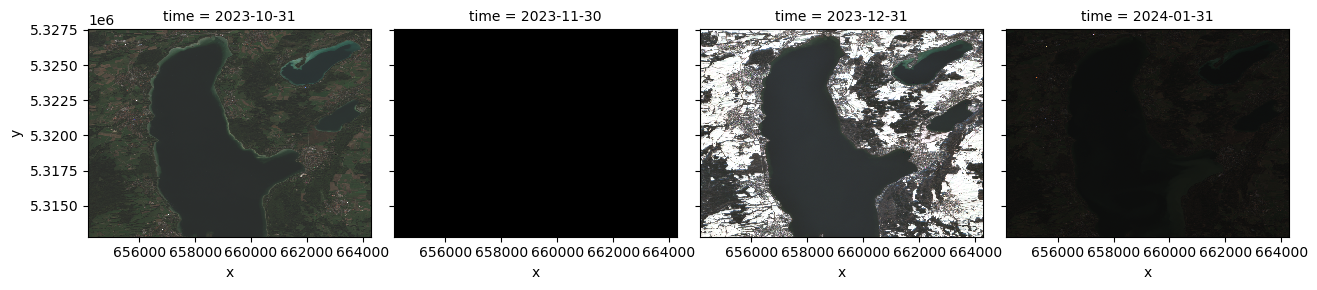

In [13]:
cube_s2[['red', 'green', 'blue']].to_array().plot.imshow(robust=True, col="time", col_wrap=4)

In [17]:
tst = cube_s2.sel(time=slice('2023-11-30', '2023-12-01')).compute()

In [18]:
tst

<xarray.Dataset>
Dimensions:      (y: 1473, x: 1010, time: 1)
Coordinates:
  * y            (y) float64 5.328e+06 5.328e+06 ... 5.313e+06 5.313e+06
  * x            (x) float64 6.542e+05 6.542e+05 ... 6.643e+05 6.643e+05
    spatial_ref  int32 32632
  * time         (time) datetime64[ns] 2023-11-30
Data variables:
    red          (time, y, x) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    green        (time, y, x) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    blue         (time, y, x) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

### <a id ='tutorials'></a> 5. More tutorials

To give you further insights into how to use STAC on terrabyte, for example how to ...
- visualize the footprints of a STAC search
- generate a data cube from a STAC search for further processing
- more details on dask usage
- If you have any use cases in mind let us know!

You can find more tutorials here: 

- [terrabyte examples](https://github.com/DLR-terrabyte/eo-examples/tree/main)
